## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


<AxesSubplot:>

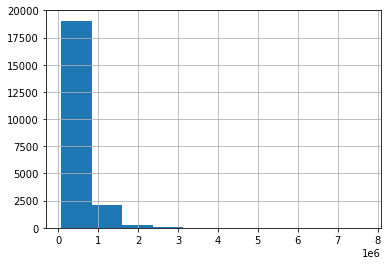

In [8]:
df.price.hist()

In [9]:
df.price = np.log(df.price.values)

<AxesSubplot:>

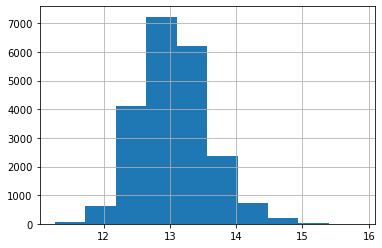

In [10]:
df.price.hist()

<AxesSubplot:ylabel='Count'>

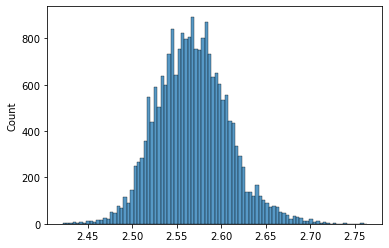

In [11]:
sns.histplot(np.log(df.price.values))

### Columns type

### Drop not relevant columns

In [12]:
df = df.drop(['id','lat', 'long', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price
0,1.0000,1180,0,0,7,1955,98178,12.3100
1,2.2500,2570,0,0,7,1951,98125,13.1956
2,1.0000,770,0,0,6,1933,98028,12.1007
3,3.0000,1960,0,0,7,1965,98136,13.3113
4,2.0000,1680,0,0,8,1987,98074,13.1422
...,...,...,...,...,...,...,...,...
21592,2.5000,1530,0,0,8,2009,98103,12.7939
21593,2.5000,2310,0,0,8,2014,98146,12.8992
21594,0.7500,1020,0,0,7,2009,98144,12.9045
21595,2.5000,1600,0,0,8,2004,98027,12.8992


### Checking Columns

In [13]:
df = df.drop(15856).reset_index(drop=True)

In [14]:
df

,bathrooms,sqft_living,waterfront,view,grade,yr_built,zipcode,price
0,1.0000,1180,0,0,7,1955,98178,12.3100
1,2.2500,2570,0,0,7,1951,98125,13.1956
2,1.0000,770,0,0,6,1933,98028,12.1007
3,3.0000,1960,0,0,7,1965,98136,13.3113
4,2.0000,1680,0,0,8,1987,98074,13.1422
...,...,...,...,...,...,...,...,...
21591,2.5000,1530,0,0,8,2009,98103,12.7939
21592,2.5000,2310,0,0,8,2014,98146,12.8992
21593,0.7500,1020,0,0,7,2009,98144,12.9045
21594,2.5000,1600,0,0,8,2004,98027,12.8992


In [16]:
df['bathrooms'] = round(df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] == 0, 1, df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms'] > 5, 5, df['bathrooms'])

## Data Cleaning

### Transform yr_built and yr_renovated

In [17]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

In [18]:
df['yr_built']

0        60
1        64
2        82
3        50
4        28
         ..
21591     6
21592     1
21593     6
21594    11
21595     7
Name: yr_built, Length: 21596, dtype: int64

In [19]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

In [20]:
#df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price
0,1.0000,1180,0,0,7,60,98178,12.3100
1,2.0000,2570,0,0,7,64,98125,13.1956
2,1.0000,770,0,0,6,82,98028,12.1007
3,3.0000,1960,0,0,7,50,98136,13.3113
4,2.0000,1680,0,0,8,28,98074,13.1422
...,...,...,...,...,...,...,...,...
21591,2.0000,1530,0,0,8,6,98103,12.7939
21592,2.0000,2310,0,0,8,1,98146,12.8992
21593,1.0000,1020,0,0,7,6,98144,12.9045
21594,2.0000,1600,0,0,8,11,98027,12.8992


### Transform zipcode

In [21]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   14.4704
98004   14.0087
98040   13.9030
98112   13.7798
98109   13.5857
          ...  
98023   12.5124
98001   12.4931
98032   12.3982
98168   12.3445
98002   12.3377
Name: price, Length: 70, dtype: float64

In [22]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

,zipcode,price
0,98039,14.4704
1,98004,14.0087
2,98040,13.9030
3,98112,13.7798
4,98109,13.5857
...,...,...
65,98023,12.5124
66,98001,12.4931
67,98032,12.3982
68,98168,12.3445


In [23]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price
0,1.0000,1180,0,0,7,60,98178,12.3100
1,2.0000,2570,0,0,7,64,98125,13.1956
2,1.0000,770,0,0,6,82,98028,12.1007
3,3.0000,1960,0,0,7,50,98136,13.3113
4,2.0000,1680,0,0,8,28,98074,13.1422
...,...,...,...,...,...,...,...,...
21591,2.0000,1530,0,0,8,6,98103,12.7939
21592,2.0000,2310,0,0,8,1,98146,12.8992
21593,1.0000,1020,0,0,7,6,98144,12.9045
21594,2.0000,1600,0,0,8,11,98027,12.8992


In [24]:
Q1 = np.percentile(pz['price'], 10)
Q2 = np.percentile(pz['price'], 20)
Q3 = np.percentile(pz['price'], 30)
Q4 = np.percentile(pz['price'], 40)
Q5 = np.percentile(pz['price'], 50)
Q6 = np.percentile(pz['price'], 60)
Q7 = np.percentile(pz['price'], 70)
Q8 = np.percentile(pz['price'], 80)
Q9 = np.percentile(pz['price'], 90)

In [25]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q4, "5", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q5, "6", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q6, "7", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q7, "8", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q8, "9", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q9, "10", pz['quantile_zip'])

In [26]:
pz

,zipcode,price,quantile_zip
0,98039,14.4704,10
1,98004,14.0087,10
2,98040,13.9030,10
3,98112,13.7798,10
4,98109,13.5857,10
...,...,...,...
65,98023,12.5124,1
66,98001,12.4931,1
67,98032,12.3982,1
68,98168,12.3445,1


In [27]:
pz.groupby('quantile_zip').count()

,zipcode,price
quantile_zip,,
1,7,7
10,7,7
2,7,7
3,7,7
4,7,7
5,7,7
6,7,7
7,7,7
8,7,7


In [28]:
df = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='inner').sample(frac=1).reset_index(drop=True)

In [29]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,zipcode,price,quantile_zip
0,2.0000,1510,0,0,7,51,98052,13.2943,8
1,2.0000,1180,0,0,8,63,98004,13.6122,10
2,2.0000,2660,0,0,9,25,98038,12.9831,3
3,2.0000,1560,0,0,7,105,98109,13.1992,10
4,2.0000,1610,0,0,7,54,98022,12.4780,3
...,...,...,...,...,...,...,...,...,...
21591,2.0000,1790,0,0,7,37,98065,12.6916,6
21592,3.0000,3800,0,0,10,46,98006,14.6910,10
21593,2.0000,2400,0,0,8,12,98059,13.0170,5
21594,3.0000,2130,0,0,7,24,98198,12.6923,2


In [30]:
df = df.drop(columns=['zipcode'], axis=1)

In [51]:
df

,bathrooms,sqft_living,waterfront,view,grade,age_build,price,quantile_zip
0,2.0000,1510,0,0,7,51,13.2943,8
1,2.0000,1180,0,0,8,63,13.6122,10
2,2.0000,2660,0,0,9,25,12.9831,3
3,2.0000,1560,0,0,7,105,13.1992,10
4,2.0000,1610,0,0,7,54,12.4780,3
...,...,...,...,...,...,...,...,...
21591,2.0000,1790,0,0,7,37,12.6916,6
21592,3.0000,3800,0,0,10,46,14.6910,10
21593,2.0000,2400,0,0,8,12,13.0170,5
21594,3.0000,2130,0,0,7,24,12.6923,2


In [54]:
#######df.to_excel("final_df_alejandra.xlsx")

In [57]:
# quantile_zip plot

## Linear Regression (trial 5)

#### XY Split

In [31]:
X5=df.drop('price', axis=1)
X5
y5=df.price
y5

0       13.2943
1       13.6122
2       12.9831
3       13.1992
4       12.4780
          ...  
21591   12.6916
21592   14.6910
21593   13.0170
21594   12.6923
21595   12.7068
Name: price, Length: 21596, dtype: float64

In [53]:
X5

,bathrooms,sqft_living,waterfront,view,grade,age_build,quantile_zip
0,2.0000,1510,0,0,7,51,8
1,2.0000,1180,0,0,8,63,10
2,2.0000,2660,0,0,9,25,3
3,2.0000,1560,0,0,7,105,10
4,2.0000,1610,0,0,7,54,3
...,...,...,...,...,...,...,...
21591,2.0000,1790,0,0,7,37,6
21592,3.0000,3800,0,0,10,46,10
21593,2.0000,2400,0,0,8,12,5
21594,3.0000,2130,0,0,7,24,2


In [33]:
df.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'age_build',
       'price', 'quantile_zip'],
      dtype='object')

#### Data Splitting

In [34]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=.30,random_state=123)

#### Standardize

In [35]:
std_scaler5 = StandardScaler().fit(X_train5) 

X_train_scaled5 = std_scaler5.transform(X_train5)

In [36]:
X_test_scaled5 = std_scaler5.transform(X_test5)

In [37]:
print(X_train_scaled5)
print("--------")
print(X_test_scaled5)

[[ 1.25385985e+00  2.14789234e+00 -8.90752000e-02 ...  1.13953996e+00
   3.05530450e-01  1.65339757e+00]
 [-8.21000703e-02  7.88043093e-01 -8.90752000e-02 ...  2.91407146e-01
  -3.66483651e-04  9.20036526e-01]
 [-1.41805999e+00 -1.37236256e+00 -8.90752000e-02 ... -1.40485848e+00
   7.13393027e-01 -5.46685558e-01]
 ...
 [ 2.58981976e+00  1.54473340e+00 -8.90752000e-02 ...  1.13953996e+00
  -1.46187405e+00  5.53356005e-01]
 [-8.21000703e-02 -5.60839624e-01 -8.90752000e-02 ...  2.91407146e-01
  -1.05401148e+00 -9.13366079e-01]
 [-8.21000703e-02 -4.54128948e-02 -8.90752000e-02 ...  2.91407146e-01
  -9.86034380e-01 -1.28004660e+00]]
--------
[[-0.08210007  0.3713151  -0.0890752  ... -0.55672567  0.81535867
   0.553356  ]
 [-0.08210007 -0.1331451  -0.0890752  ... -0.55672567  0.06761061
  -0.91336608]
 [-0.08210007  0.66741131 -0.0890752  ... -0.55672567 -1.12198857
   0.18667548]
 ...
 [-0.08210007  0.36034857 -0.0890752  ...  0.29140715  0.20356481
   0.553356  ]
 [-0.08210007 -1.03240025 

In [38]:
X_train_const_scaled5 = sm.add_constant(X_train_scaled5) 

model5 = sm.OLS(y_train5, X_train_const_scaled5).fit()
predictions_train5 = model5.predict(X_train_const_scaled5) 

X_test_const_scaled5 = sm.add_constant(X_test_scaled5) 
predictions_test5 = model5.predict(X_test_const_scaled5) 
print_model5 = model5.summary()
print(print_model5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:05:19   Log-Likelihood:                 1830.7
No. Observations:               15117   AIC:                            -3645.
Df Residuals:                   15109   BIC:                            -3584.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0461      0.002   7480.497      0.0

#### Model validation

In [39]:
#using sklearn
model5=LinearRegression()    # model
model5.fit(X_train_scaled5, y_train5)   # model train

LinearRegression()

In [40]:
model5.coef_ #gives you per column the slope (alpha)

array([0.03205168, 0.16974166, 0.03610064, 0.0482672 , 0.14170762,
       0.07124755, 0.26156903])

In [41]:
model5.intercept_ #gives the optimal slope

13.046109584078856

In [42]:
R2_test5 = model5.score(X_test_scaled5,y_test5) # measure R2
R2_test5

0.832370340790321

In [43]:
# Making prediction
y_pred5 = model5.predict(X_test_scaled5)
y_pred5

array([13.21262958, 12.69007738, 13.02894593, ..., 13.35106855,
       12.83390776, 13.11586064])

In [44]:
y_test5

14863   13.4545
2277    12.4549
21578   13.2267
18669   12.8739
21453   12.6916
          ...  
12811   12.9831
12288   12.8049
6556    13.4807
16310   13.0519
1050    13.2794
Name: price, Length: 6479, dtype: float64

In [45]:
result=pd.DataFrame({"y_test":y_test5,"y_pred":y_pred5})

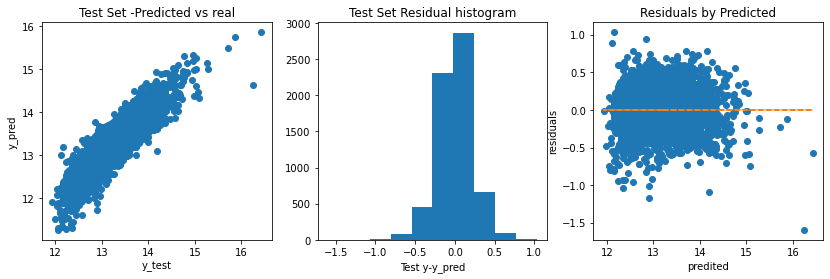

In [46]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred5, y_test5, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test5 - y_pred5)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred5,y_test5 - y_pred5,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred5,np.zeros(len(y_pred5)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

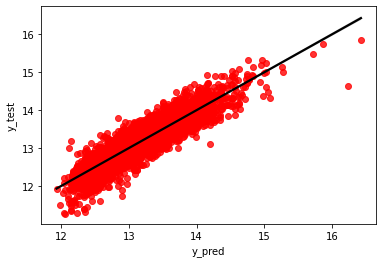

In [47]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [48]:
print(mse(y_test5,y_pred5))
print(mae(y_test5,y_pred5))

0.047591580623776955
0.16517032963058123


#### Features Importance

In [49]:
features_importances5 = pd.DataFrame(data={
    'Attribute': X_train5.columns,
    'Importance': abs(model5.coef_)
})
features_importances5 = features_importances5.sort_values(by='Importance', ascending=False)
features_importances5

,Attribute,Importance
6,quantile_zip,0.2616
1,sqft_living,0.1697
4,grade,0.1417
5,age_build,0.0712
3,view,0.0483
2,waterfront,0.0361
0,bathrooms,0.0321
